In [7]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
ftse = pd.read_excel('data/FTSE_monthly.xlsx')

In [73]:
ftse.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 7 columns):
Date      176 non-null datetime64[ns]
Price     176 non-null float64
Open      176 non-null float64
High      176 non-null float64
Low       176 non-null float64
Volume    176 non-null object
Change    176 non-null float64
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 9.7+ KB


In [74]:
ftse.head()

,Date,Price,Open,High,Low,Volume,Change
0,2017-08-01,7522.00,7408.00,7534.25,7379.50,-,0.0203
1,2017-07-01,7372.00,7312.72,7515.12,7303.46,16.51B,0.0081
2,2017-06-01,7312.72,7519.95,7598.99,7302.71,19.72B,-0.0276
3,2017-05-01,7519.95,7203.94,7586.45,7203.94,18.87B,0.0439
4,2017-04-01,7203.94,7322.92,7406.35,7096.83,16.25B,-0.0162


In [75]:
ftse['Volume'] = ftse['Volume'].str.replace("B", "")
ftse['Volume'] = ftse['Volume'].str.replace("-", "")

In [76]:
ftse['Volume'] = pd.to_numeric(ftse['Volume'])

In [77]:
ftse.tail()

,Date,Price,Open,High,Low,Volume,Change
171,2003-05-01,4048.1,3926.0,4096.0,3875.3,NaN,0.0311
172,2003-04-01,3926.0,3613.3,3997.3,3612.3,NaN,0.0865
173,2003-03-01,3613.3,3655.6,3881.7,3277.5,NaN,-0.0116
174,2003-02-01,3655.6,3567.4,3747.0,3535.1,NaN,0.0247
175,2003-01-01,3567.4,3940.4,4027.6,3391.5,NaN,-0.0947


In [78]:
ftse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 7 columns):
Date      176 non-null datetime64[ns]
Price     176 non-null float64
Open      176 non-null float64
High      176 non-null float64
Low       176 non-null float64
Volume    168 non-null float64
Change    176 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 9.7 KB


In [79]:
avg_prices = pd.read_csv('data/avg_prices_by_type.csv')
avg_prices.head()

,Date,Region_Name,Detached_Average_Price,Detached_Index,Detached_Monthly_Change,Detached_Annual_Change,Semi_Detached_Average_Price,Semi_Detached_Index,Semi_Detached_Monthly_Change,Semi_Detached_Annual_Change,Terraced_Average_Price,Terraced_Index,Terraced_Monthly_Change,Terraced_Annual_Change,Flat_Average_Price,Flat_Index,Flat_Monthly_Change,Flat_Annual_Change
0,1/1/2004,Aberdeenshire,122490.0641,43.610982,NaN,NaN,70563.15784,40.821887,NaN,NaN,55319.63336,38.305671,NaN,NaN,48016.07412,42.433549,NaN,NaN
1,2/1/2004,Aberdeenshire,121280.8840,43.180469,-0.987166,NaN,70804.42408,40.961464,0.341915,NaN,55720.07531,38.582954,0.723869,NaN,49030.18133,43.329752,2.112016,NaN
2,3/1/2004,Aberdeenshire,123395.4269,43.933325,1.743509,NaN,72689.07253,42.051762,2.661767,NaN,57362.85925,39.720488,2.948280,NaN,50349.44771,44.495636,2.690723,NaN
3,4/1/2004,Aberdeenshire,122334.0258,43.555427,-0.860162,NaN,74484.23119,43.090289,2.469640,NaN,59193.39722,40.988030,3.191155,NaN,51736.22329,45.721180,2.754301,NaN
4,5/1/2004,Aberdeenshire,124498.8747,44.326193,1.769621,NaN,76637.73414,44.336124,2.891220,NaN,61202.79629,42.379424,3.394634,NaN,53230.23061,47.041488,2.887739,NaN


In [80]:
avg_prices['Date'] = pd.to_datetime(avg_prices['Date'])

In [81]:
avg_prices.head(30)

,Date,Region_Name,Detached_Average_Price,Detached_Index,Detached_Monthly_Change,Detached_Annual_Change,Semi_Detached_Average_Price,Semi_Detached_Index,Semi_Detached_Monthly_Change,Semi_Detached_Annual_Change,Terraced_Average_Price,Terraced_Index,Terraced_Monthly_Change,Terraced_Annual_Change,Flat_Average_Price,Flat_Index,Flat_Monthly_Change,Flat_Annual_Change
0,2004-01-01,Aberdeenshire,122490.0641,43.610982,NaN,NaN,70563.15784,40.821887,NaN,NaN,55319.63336,38.305671,NaN,NaN,48016.07412,42.433549,NaN,NaN
1,2004-02-01,Aberdeenshire,121280.8840,43.180469,-0.987166,NaN,70804.42408,40.961464,0.341915,NaN,55720.07531,38.582954,0.723869,NaN,49030.18133,43.329752,2.112016,NaN
2,2004-03-01,Aberdeenshire,123395.4269,43.933325,1.743509,NaN,72689.07253,42.051762,2.661767,NaN,57362.85925,39.720488,2.948280,NaN,50349.44771,44.495636,2.690723,NaN
3,2004-04-01,Aberdeenshire,122334.0258,43.555427,-0.860162,NaN,74484.23119,43.090289,2.469640,NaN,59193.39722,40.988030,3.191155,NaN,51736.22329,45.721180,2.754301,NaN
4,2004-05-01,Aberdeenshire,124498.8747,44.326193,1.769621,NaN,76637.73414,44.336124,2.891220,NaN,61202.79629,42.379424,3.394634,NaN,53230.23061,47.041488,2.887739,NaN
5,2004-06-01,Aberdeenshire,128071.9068,45.598324,2.869931,NaN,79356.90064,45.909205,3.548078,NaN,63570.90975,44.019207,3.869290,NaN,55394.75906,48.954361,4.066352,NaN
6,2004-07-01,Aberdeenshire,134623.3091,47.930865,5.115409,NaN,82153.68155,47.527186,3.524307,NaN,65700.60801,45.493900,3.350114,NaN,57178.78119,50.530966,3.220561,NaN
7,2004-08-01,Aberdeenshire,142258.3333,50.649215,5.671398,NaN,86030.40980,49.769934,4.718873,NaN,68698.43270,47.569722,4.562857,NaN,59619.85050,52.688228,4.269187,NaN
8,2004-09-01,Aberdeenshire,143919.2005,51.240545,1.167501,NaN,86628.99397,50.116224,0.695782,NaN,69134.07593,47.871380,0.634139,NaN,59922.32752,52.955538,0.507343,NaN
9,2004-10-01,Aberdeenshire,144543.4822,51.462813,0.433772,NaN,86809.74081,50.220789,0.208645,NaN,69342.68033,48.015826,0.301739,NaN,60444.54511,53.417040,0.871491,NaN


In [82]:
avg_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109752 entries, 0 to 109751
Data columns (total 18 columns):
Date                            109752 non-null datetime64[ns]
Region_Name                     109752 non-null object
Detached_Average_Price          109488 non-null float64
Detached_Index                  109488 non-null float64
Detached_Monthly_Change         109056 non-null float64
Detached_Annual_Change          104328 non-null float64
Semi_Detached_Average_Price     109488 non-null float64
Semi_Detached_Index             109488 non-null float64
Semi_Detached_Monthly_Change    109056 non-null float64
Semi_Detached_Annual_Change     104328 non-null float64
Terraced_Average_Price          109503 non-null float64
Terraced_Index                  109503 non-null float64
Terraced_Monthly_Change         109071 non-null float64
Terraced_Annual_Change          104343 non-null float64
Flat_Average_Price              109752 non-null float64
Flat_Index                      109752 non-

In [83]:
uk_avg = avg_prices[avg_prices['Region_Name'] == 'United Kingdom']
uk_avg

,Date,Region_Name,Detached_Average_Price,Detached_Index,Detached_Monthly_Change,Detached_Annual_Change,Semi_Detached_Average_Price,Semi_Detached_Index,Semi_Detached_Monthly_Change,Semi_Detached_Annual_Change,Terraced_Average_Price,Terraced_Index,Terraced_Monthly_Change,Terraced_Annual_Change,Flat_Average_Price,Flat_Index,Flat_Monthly_Change,Flat_Annual_Change
96744,2005-01-01,United Kingdom,236191.4579,82.087507,NaN,NaN,145912.5214,81.615421,NaN,NaN,119750.1030,77.525064,NaN,NaN,127017.9264,73.796342,NaN,NaN
96745,2005-02-01,United Kingdom,234509.0375,81.502788,-0.712312,NaN,146577.6047,81.987432,0.455810,NaN,119433.8976,77.320355,-0.264054,NaN,127045.5011,73.812363,0.021709,NaN
96746,2005-03-01,United Kingdom,235037.6114,81.686491,0.225396,NaN,147323.6604,82.404734,0.508983,NaN,120942.5310,78.297030,1.263153,NaN,128371.5069,74.582761,1.043725,NaN
96747,2005-04-01,United Kingdom,236330.3565,82.135781,0.550016,NaN,149615.1811,83.686485,1.555433,NaN,122905.5760,79.567887,1.623122,NaN,130544.9035,75.845486,1.693052,NaN
96748,2005-05-01,United Kingdom,240601.4415,83.620181,1.807252,NaN,150579.9645,84.226131,0.644843,NaN,124214.6427,80.415364,1.065099,NaN,131826.0256,76.589807,0.981365,NaN
96749,2005-06-01,United Kingdom,239088.6285,83.094408,-0.628763,NaN,151656.9084,84.828514,0.715197,NaN,126132.7741,81.657144,1.544207,NaN,133123.5901,77.343681,0.984301,NaN
96750,2005-07-01,United Kingdom,244140.6815,84.850231,2.113046,NaN,154293.3413,86.303190,1.738419,NaN,127392.7236,82.472823,0.998907,NaN,133757.8835,77.712200,0.476470,NaN
96751,2005-08-01,United Kingdom,246629.2805,85.715135,1.019330,NaN,153880.1818,86.072091,-0.267775,NaN,128019.3396,82.878488,0.491877,NaN,134529.8845,78.160726,0.577163,NaN
96752,2005-09-01,United Kingdom,244950.6172,85.131722,-0.680642,NaN,153646.7433,85.941518,-0.151701,NaN,128512.3005,83.197626,0.385067,NaN,133819.6380,77.748079,-0.527947,NaN
96753,2005-10-01,United Kingdom,244596.2285,85.008555,-0.144678,NaN,153721.5323,85.983351,0.048676,NaN,127975.8566,82.850337,-0.417426,NaN,133528.5599,77.578965,-0.217515,NaN


In [157]:
uk_avg1 = uk_avg[['Date', 'Detached_Average_Price', 'Semi_Detached_Average_Price', 'Terraced_Average_Price', 'Flat_Average_Price']].reset_index(drop=True)
uk_avg1.head(20)

,Date,Detached_Average_Price,Semi_Detached_Average_Price,Terraced_Average_Price,Flat_Average_Price
0,2005-01-01,236191.4579,145912.5214,119750.1030,127017.9264
1,2005-02-01,234509.0375,146577.6047,119433.8976,127045.5011
2,2005-03-01,235037.6114,147323.6604,120942.5310,128371.5069
3,2005-04-01,236330.3565,149615.1811,122905.5760,130544.9035
4,2005-05-01,240601.4415,150579.9645,124214.6427,131826.0256
5,2005-06-01,239088.6285,151656.9084,126132.7741,133123.5901
6,2005-07-01,244140.6815,154293.3413,127392.7236,133757.8835
7,2005-08-01,246629.2805,153880.1818,128019.3396,134529.8845
8,2005-09-01,244950.6172,153646.7433,128512.3005,133819.6380
9,2005-10-01,244596.2285,153721.5323,127975.8566,133528.5599


In [174]:
c = np.asarray(uk_avg1['Date'])
c

array([datetime.date(2005, 1, 1), datetime.date(2005, 2, 1),
       datetime.date(2005, 3, 1), datetime.date(2005, 4, 1),
       datetime.date(2005, 5, 1), datetime.date(2005, 6, 1),
       datetime.date(2005, 7, 1), datetime.date(2005, 8, 1),
       datetime.date(2005, 9, 1), datetime.date(2005, 10, 1),
       datetime.date(2005, 11, 1), datetime.date(2005, 12, 1),
       datetime.date(2006, 1, 1), datetime.date(2006, 2, 1),
       datetime.date(2006, 3, 1), datetime.date(2006, 4, 1),
       datetime.date(2006, 5, 1), datetime.date(2006, 6, 1),
       datetime.date(2006, 7, 1), datetime.date(2006, 8, 1),
       datetime.date(2006, 9, 1), datetime.date(2006, 10, 1),
       datetime.date(2006, 11, 1), datetime.date(2006, 12, 1),
       datetime.date(2007, 1, 1), datetime.date(2007, 2, 1),
       datetime.date(2007, 3, 1), datetime.date(2007, 4, 1),
       datetime.date(2007, 5, 1), datetime.date(2007, 6, 1),
       datetime.date(2007, 7, 1), datetime.date(2007, 8, 1),
       datetime.da

In [181]:
d = ftse['Date']
e = d.map(pd.Timestamp.date)
e[1]

datetime.date(2017, 7, 1)

In [189]:
ftse['Date'] = e

In [195]:
a = uk_avg1.loc[15,'Date']
a

datetime.date(2006, 4, 1)

In [196]:
b = ftse.loc[136,'Date']
b

datetime.date(2006, 4, 1)

In [197]:
a==b

True

In [201]:
type(a) == type(b)

True

In [198]:
type(uk_avg1.Date[1])

datetime.date

In [199]:
type(ftse.Date[1])

datetime.date

In [217]:
comp_ftse_house = ftse.merge(uk_avg1, on='Date')
comp_ftse_house1 = comp_ftse_house.drop_duplicates(subset=['Price', 'Detached_Average_Price']).reset_index(drop=True)
comp_ftse_house1

,Date,Price,Open,High,Low,Volume,Change,Detached_Average_Price,Semi_Detached_Average_Price,Terraced_Average_Price,Flat_Average_Price
0,2016-12-01,7142.83,6783.79,7142.83,6678.74,15.40,0.0529,333440.5085,206215.7843,176571.4720,198482.7809
1,2016-11-01,6783.79,6954.22,6997.25,6676.56,20.47,-0.0245,328897.1420,203000.9415,174288.0029,195894.4357
2,2016-10-01,6954.22,6899.33,7129.83,6898.09,19.25,0.0080,326185.1176,201872.0139,172829.5183,194393.4056
3,2016-09-01,6899.33,6781.51,6941.09,6654.48,18.67,0.0174,326144.8913,202575.5005,175067.7291,194598.1797
4,2016-08-01,6781.51,6724.43,6955.34,6615.83,16.19,0.0085,324155.0146,202607.6036,175439.3337,193925.1357
5,2016-07-01,6724.43,6504.33,6780.05,6432.47,19.72,0.0338,323890.6700,203264.3956,175919.8323,194808.1020
6,2016-06-01,6504.33,6230.79,6504.33,5788.74,25.47,0.0439,323188.5470,201892.1012,174686.9657,194691.8143
7,2016-05-01,6230.79,6241.89,6290.07,6050.21,15.08,-0.0018,315325.7796,199624.2983,172946.4086,192559.5946
8,2016-04-01,6241.89,6174.90,6427.32,6061.85,15.84,0.0108,310164.9019,197177.1885,170419.6965,187778.4257
9,2016-03-01,6174.90,6097.09,6237.02,6036.70,16.59,0.0128,313564.4947,192884.3872,167655.7422,189179.8963


In [218]:
comp_ftse_house1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 11 columns):
Date                           144 non-null object
Price                          144 non-null float64
Open                           144 non-null float64
High                           144 non-null float64
Low                            144 non-null float64
Volume                         144 non-null float64
Change                         144 non-null float64
Detached_Average_Price         144 non-null float64
Semi_Detached_Average_Price    144 non-null float64
Terraced_Average_Price         144 non-null float64
Flat_Average_Price             144 non-null float64
dtypes: float64(10), object(1)
memory usage: 12.4+ KB


In [253]:
comp_ftse_house2 = comp_ftse_house1.drop(['Open', 'High', 'Low', 'Volume', 'Change'], axis=1).sort_values(by='Date')
comp_ftse_house2 = comp_ftse_house2.set_index('Date')
comp_ftse_house2.head(10)

,Price,Detached_Average_Price,Semi_Detached_Average_Price,Terraced_Average_Price,Flat_Average_Price
Date,,,,,
2005-01-01,4852.31,236191.4579,145912.5214,119750.1030,127017.9264
2005-02-01,4968.50,234509.0375,146577.6047,119433.8976,127045.5011
2005-03-01,4894.37,235037.6114,147323.6604,120942.5310,128371.5069
2005-04-01,4801.68,236330.3565,149615.1811,122905.5760,130544.9035
2005-05-01,4963.97,240601.4415,150579.9645,124214.6427,131826.0256
2005-06-01,5113.16,239088.6285,151656.9084,126132.7741,133123.5901
2005-07-01,5282.30,244140.6815,154293.3413,127392.7236,133757.8835
2005-08-01,5296.92,246629.2805,153880.1818,128019.3396,134529.8845
2005-09-01,5477.71,244950.6172,153646.7433,128512.3005,133819.6380


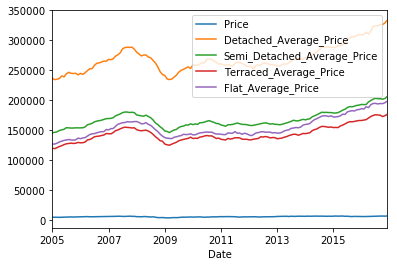

In [254]:
comp_ftse_house2.plot()
plt.show()

In [255]:
comp_ftse_house2.corr(method='pearson')

,Price,Detached_Average_Price,Semi_Detached_Average_Price,Terraced_Average_Price,Flat_Average_Price
Price,1.000000,0.709730,0.708315,0.709655,0.695212
Detached_Average_Price,0.709730,1.000000,0.991448,0.989686,0.980840
Semi_Detached_Average_Price,0.708315,0.991448,1.000000,0.995199,0.981212
Terraced_Average_Price,0.709655,0.989686,0.995199,1.000000,0.988359
Flat_Average_Price,0.695212,0.980840,0.981212,0.988359,1.000000


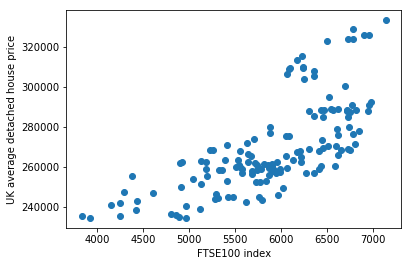

In [309]:
plt.scatter(x=comp_ftse_house2['Price'], y=comp_ftse_house2['Detached_Average_Price'])
plt.xlabel('FTSE100 index')
plt.ylabel('UK average detached house price')
plt.show()

In [257]:
import scipy.stats

In [258]:
scipy.stats.linregress(comp_ftse_house2['Price'], comp_ftse_house2['Detached_Average_Price'])

LinregressResult(slope=22.370448652956618, intercept=137666.44192616324, rvalue=0.70972975711320374, pvalue=2.3326218253023959e-23, stderr=1.863384595964545)

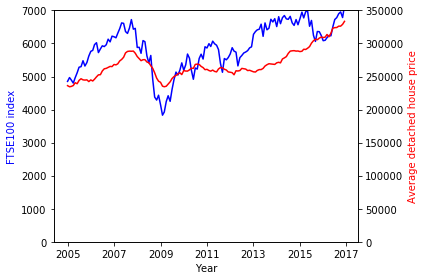

In [312]:
fig, ax1 = plt.subplots()

ax1.plot(comp_ftse_house2['Price'], 'b-')
ax1.set_xlabel('Year')
ax1.set_ylabel('FTSE100 index', color='b')
ax1.set_ylim(bottom=0, top=7000)

ax2 = ax1.twinx()
ax2.plot(comp_ftse_house2['Detached_Average_Price'], 'r-')
ax2.set_ylabel('Average detached house price', color='r')
ax2.set_ylim(bottom=0, top=350000)


fig.tight_layout()
plt.show()

In [313]:
i=9 # sets the number of months for rolling mean
j=i-1
comp_ftse_house2['ftse_3mth_mean'] = comp_ftse_house2['Price'].rolling(i).mean()
scipy.stats.linregress(comp_ftse_house2.iloc[j:,5], comp_ftse_house2.iloc[j:,1])

LinregressResult(slope=25.095115416503297, intercept=123437.69254894039, rvalue=0.73857748135979473, pvalue=1.0508521127710207e-24, stderr=1.9788335198410649)

In [294]:
comp_ftse_house2.head(10)

,Price,Detached_Average_Price,Semi_Detached_Average_Price,Terraced_Average_Price,Flat_Average_Price,ftse_3mth_mean
Date,,,,,,
2005-01-01,4852.31,236191.4579,145912.5214,119750.1030,127017.9264,NaN
2005-02-01,4968.50,234509.0375,146577.6047,119433.8976,127045.5011,NaN
2005-03-01,4894.37,235037.6114,147323.6604,120942.5310,128371.5069,NaN
2005-04-01,4801.68,236330.3565,149615.1811,122905.5760,130544.9035,NaN
2005-05-01,4963.97,240601.4415,150579.9645,124214.6427,131826.0256,NaN
2005-06-01,5113.16,239088.6285,151656.9084,126132.7741,133123.5901,NaN
2005-07-01,5282.30,244140.6815,154293.3413,127392.7236,133757.8835,NaN
2005-08-01,5296.92,246629.2805,153880.1818,128019.3396,134529.8845,NaN
2005-09-01,5477.71,244950.6172,153646.7433,128512.3005,133819.6380,5072.324444


r-value is highest with a 9-month rolling mean at 0.74; whereas r-value with no rolling mean is 0.71

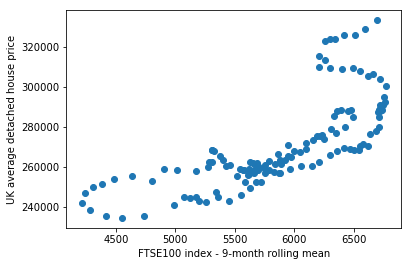

In [314]:
plt.scatter(x = comp_ftse_house2.iloc[j:,-1], y = comp_ftse_house2.iloc[j:,1])
plt.xlabel('FTSE100 index - 9-month rolling mean')
plt.ylabel('UK average detached house price')
plt.show()

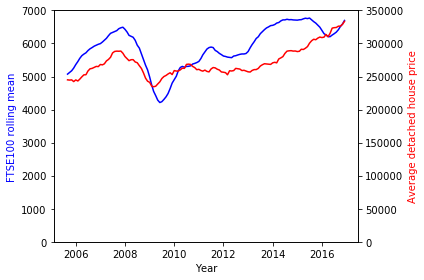

In [311]:
fig, ax1 = plt.subplots()

ax1.plot(comp_ftse_house2.iloc[j:,-1], 'b-')
ax1.set_xlabel('Year')
ax1.set_ylabel('FTSE100 rolling mean', color='b')
ax1.set_ylim(bottom=0, top=7000)

ax2 = ax1.twinx()
ax2.plot(comp_ftse_house2.iloc[j:,1], 'r-')
ax2.set_ylabel('Average detached house price', color='r')
ax2.set_ylim(bottom=0, top=350000)


fig.tight_layout()
plt.show()